DECISION TREES AND RANDOM FOREST PROJECT

IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

GET THE DATA

We will use pandas to read loan_data.csv into a data frame called loans.

In [3]:
loans = pd.read_csv('loan_data.csv')

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


EXPLORATORY DATA ANALYSIS

We will do some data visualization using seaborn and pandas built-in plotting capabilities.

We will create a histogram for 2 FICO distributions on top of each other, one for each credit.policy outcome.

Text(0.5, 0, 'FICO')

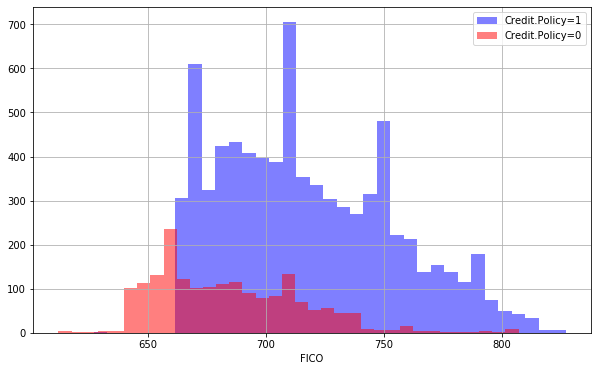

In [20]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy'] == 1]['fico'].hist(alpha=0.5, bins=35, color='blue', label='Credit.Policy=1')
loans[loans['credit.policy'] == 0]['fico'].hist(alpha=0.5, bins=35, color='red', label='Credit.Policy=0')

plt.legend()
plt.xlabel('FICO')

From this visualization histogram plot we can see that in our data set we have more people that have Credit.Policy=1 than people 
have Credit.Policy=0.
Credit.Policy is 1 if the customer  meets he credit underwritting criteria of LendingClub.com, and 0 otherwise.
 

We can also see that people who have a lower FICO score tend to have a Credit.Policy of 0. From the plot, we see that people who have a FICO score less than 660 have Credit.Policy=0 , so they don't meet the underwritting criteria for the credit

Now, we will create a histogram for 2 FICO distributions on top of each other, one for each not.fully.paid column, which is the
value we want to predict.

Text(0.5, 0, 'FICO')

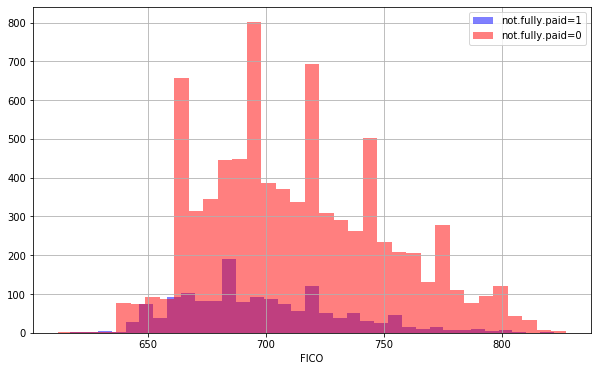

In [28]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,bins=35, color='blue',label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,bins=35, color='red', label='not.fully.paid=0')

plt.legend()
plt.xlabel('FICO')

From the plot, we can see that the majority of people have not.fully.paid=0, this means they fully paid their loans.

Next, we will create a countplot using seaborn, showing the counts of loans by purpose, with the color hue defined by not.fully.paid.

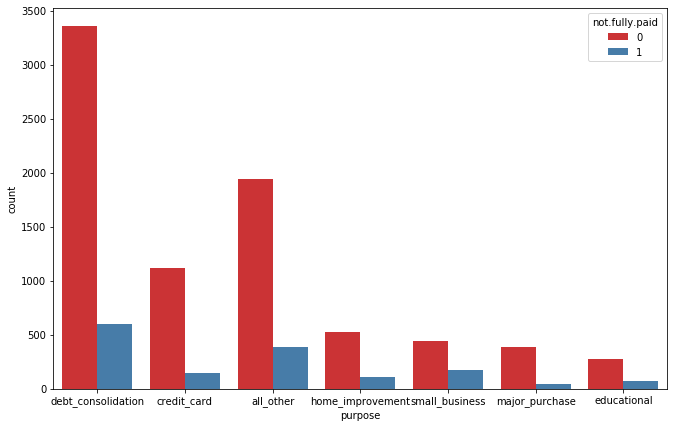

In [30]:
plt.figure(figsize=(11,7))
sns.countplot(data=loans, x='purpose', hue='not.fully.paid',palette='Set1')

From the plot we can see that debt_consolidation is the main reason for wanting a loan. The ration between fully paid and not fully paid
seems to be similar for all the reasons.

Next, we will create a jointplot to see the trend between FICO score and interest rate.

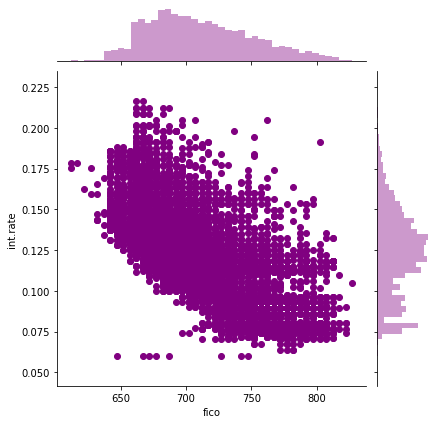

In [31]:
sns.jointplot(data=loans, x='fico', y='int.rate', color='purple')

We can see that for higher FICO scores the int.rate decreases. The borrowers with higher int.rate are considered to be more risky.

At the next step, we will create 2 lmplots to see if the trend differed between not.fully.paid and credit.policy columns.

<Figure size 792x504 with 0 Axes>

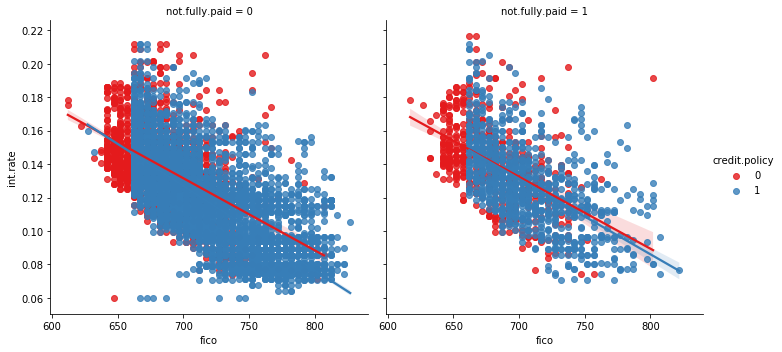

In [35]:
plt.figure(figsize=(11,7))
sns.lmplot(data=loans, y='int.rate', x='fico', hue='credit.policy', palette='Set1',col='not.fully.paid')

SETTING UP THE DATA

In [36]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


CATEGORICAL FEATURES

The purpose column is a categorical column, it can take the following values: "debt_consolidation", "credit_card", "all_other",
"home_improvement", "small_business", "major_purchase", "educational".
We will need to transform this column using dummy variables, so that sklearn will be able to understand this data.

In [41]:
cat_feats = ['purpose']

Instead of a column name, here can be passed multiple columns. We will use pd.get_dummies(loans, columns=cat_feats,drop_first=True)
to create a fixed larger dataframe that has new feature columns with dummy variables. The column 'purpose' will be replaced with multiple columns named: purpose_credit_card, purpose_debt_consolidation, purpose_educational, etc. These columns can take 
values 0 or 1, depending on the purpose for each borrower.

In [43]:
final_data = pd.get_dummies(loans, columns = cat_feats, drop_first=True)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


TRAIN TEST SPLIT

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

TRAINING A DECISION TREE MODEL

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dtree = DecisionTreeClassifier()

In [49]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

PREDICTIONS AND EVALUATION OF DECISION TREE

In [50]:
predictions = dtree.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
print('Classification report: ')
print('\n')
print(classification_report(y_test,predictions))

Classification report: 


              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.19      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [53]:
print('Confusion matrix: ')
print('\n')
print(confusion_matrix(y_test, predictions))

Confusion matrix: 


[[1989  442]
 [ 336  107]]


TRAINING THE RANDOM FOREST MODEL

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc = RandomForestClassifier(n_estimators=300)

In [56]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

PREDICTIONS AND EVALUATIONS

In [57]:
predictions = rfc.predict(X_test)

In [58]:
print('Classification report: ')
print('\n')
print(classification_report(y_test,predictions))

Classification report: 


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.56      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.70      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [59]:
print('Confusion matrix: ')
print('\n')
print(confusion_matrix(y_test,predictions))

Confusion matrix: 


[[2423    8]
 [ 433   10]]


In [ ]:
We can observe that the recall for '1' class for random forest is 0.02, so the decision tree did better for this class.
Overall, the random forest algoritm did better.